# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 17, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Guanxiong Liu
    Jiankun Bi
    Naveen Pothayath
    Suchithra Balakrishnan
    Abhishek Easwaran

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [20]:
# import libs
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
# read in data
dataset = load_files('./text_analytics/data/movie_reviews/txt_sentoken/', shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [22]:
# split into training and test data sets
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, 
                                                          test_size=0.25, random_state=None)

In [4]:
# building pipeline which is used to process the data in order
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)), # vectorization
        ('clf', LinearSVC(C=1000)), # linear support vector classifier
    ])

In [5]:
# set up parameters for voctorization process and use grid_search to fit the training data
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [6]:
# print out model score
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))


0 params - {'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.83; std - 0.01


In [7]:
# predict the test data set and print out the result with best cross validation model
y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

             precision    recall  f1-score   support

        neg       0.90      0.87      0.88       247
        pos       0.88      0.91      0.89       253

avg / total       0.89      0.89      0.89       500

[[215  32]
 [ 24 229]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

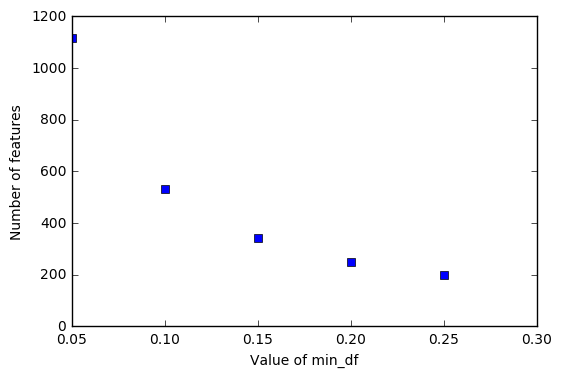

In [21]:
for i in np.arange(0.05, 0.3, 0.05):
    vector = TfidfVectorizer(min_df=i, max_df=0.9)
    matrix = vector.fit_transform(docs_train)
    plt.plot(i,matrix.shape[1],'bs')

plt.xlabel('Value of min_df')
plt.ylabel('Number of features')

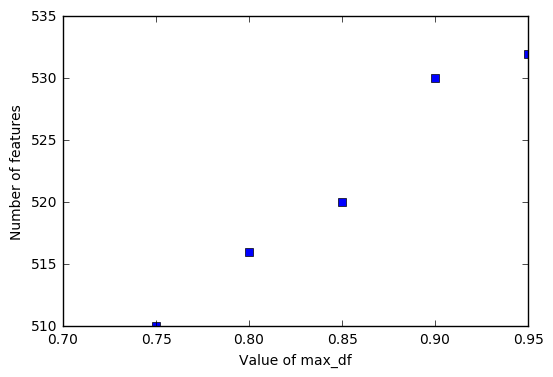

In [22]:
for i in np.arange(0.95, 0.7, -0.05):
    vector = TfidfVectorizer(min_df=0.1, max_df=i)
    matrix = vector.fit_transform(docs_train)
    plt.plot(i,matrix.shape[1],'bs')

plt.xlabel('Value of max_df')
plt.ylabel('Number of features')

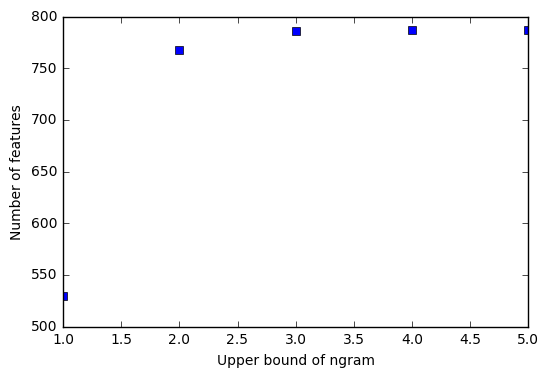

In [24]:
ngram_candidate = range(1,6)
for ngram in ngram_candidate:
    vector = TfidfVectorizer(min_df=0.1, max_df=0.9, ngram_range=(1,ngram))
    matrix = vector.fit_transform(docs_train)
    plt.plot(ngram,matrix.shape[1],'bs')

plt.xlabel('Upper bound of ngram')
plt.ylabel('Number of features')

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# prepare the Xtrain and Xtest
vector = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,2))
vector.fit(docs_train)

Xtrain = vector.transform(docs_train)
Xtest  = vector.transform(docs_test)

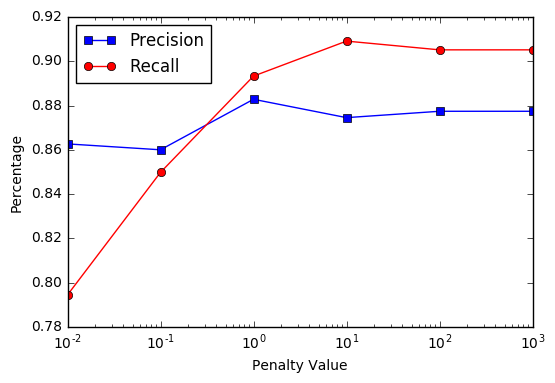

In [29]:
# examine LinearSVC
svc_C = [1000, 100, 10, 1, 0.1, 0.01]
precision = []
recall = []

for param in svc_C:
    svc = LinearSVC(C=param)
    svc.fit(Xtrain, y_train)
    y_predicted = svc.predict(Xtest)
    
    cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
    precision.append(cm[1,1] / (1.0 * (cm[1,1] + cm[0,1])))
    recall.append(cm[1,1] / (1.0 * (cm[1,1] + cm[1,0])))
    
plt.semilogx(svc_C, precision, '-bs', label='Precision')
plt.semilogx(svc_C, recall, '-ro', label='Recall')
plt.xlabel('Penalty Value')
plt.ylabel('Percentage')
plt.legend(loc='best')

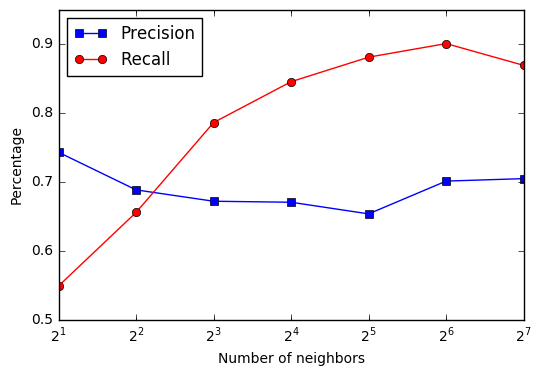

In [34]:
# examine LinearSVC
KNN_n_neighbors = [2, 4, 8, 16, 32, 64, 128]
precision = []
recall = []

for param in KNN_n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=param)
    KNN.fit(Xtrain, y_train)
    y_predicted = KNN.predict(Xtest)
    
    cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
    precision.append(cm[1,1] / (1.0 * (cm[1,1] + cm[0,1])))
    recall.append(cm[1,1] / (1.0 * (cm[1,1] + cm[1,0])))
    
plt.semilogx(KNN_n_neighbors, precision, '-bs', label='Precision', basex=2)
plt.semilogx(KNN_n_neighbors, recall, '-ro', label='Recall', basex=2)
plt.xlabel('Number of neighbors')
plt.ylabel('Percentage')
plt.legend(loc='best')

In [18]:
# LinearSVC
print ('======= Start Evaluation of LinearSVC =======')
pipeline = Pipeline([
        ('vect', TfidfVectorizer()), # vectorization
        ('clf', LinearSVC()), # linear support vector classifier
    ])

parameters = {
        'vect__ngram_range': [(1, 2), (1, 3)],
        'vect__min_df': [2, 3, 4],
        'vect__max_df': [0.98, 0.95, 0.92],
        'clf__C': [1000, 800, 600],
    }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

======= Start Evaluation of LinearSVC =======
0 params - {'vect__ngram_range': (1, 2), 'clf__C': 1000, 'vect__min_df': 2, 'vect__max_df': 0.98}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 3), 'clf__C': 1000, 'vect__min_df': 2, 'vect__max_df': 0.98}; mean - 0.84; std - 0.01
2 params - {'vect__ngram_range': (1, 2), 'clf__C': 1000, 'vect__min_df': 3, 'vect__max_df': 0.98}; mean - 0.84; std - 0.01
3 params - {'vect__ngram_range': (1, 3), 'clf__C': 1000, 'vect__min_df': 3, 'vect__max_df': 0.98}; mean - 0.84; std - 0.01
4 params - {'vect__ngram_range': (1, 2), 'clf__C': 1000, 'vect__min_df': 4, 'vect__max_df': 0.98}; mean - 0.84; std - 0.01
5 params - {'vect__ngram_range': (1, 3), 'clf__C': 1000, 'vect__min_df': 4, 'vect__max_df': 0.98}; mean - 0.84; std - 0.01
6 params - {'vect__ngram_range': (1, 2), 'clf__C': 1000, 'vect__min_df': 2, 'vect__max_df': 0.95}; mean - 0.84; std - 0.01
7 params - {'vect__ngram_range': (1, 3), 'clf__C': 1000, 'vect__min_df': 2, 'vect__max_df': 0

In [35]:
# K nearst neighbor
print ('======= Start Evaluation of KNN =======')
pipeline = Pipeline([
        ('vect', TfidfVectorizer()), # vectorization
        ('clf', KNeighborsClassifier()), # KNN classifier
    ])

parameters = {
        'vect__ngram_range': [(1, 2), (1, 3)],
        'vect__min_df': [2, 3, 4],
        'vect__max_df': [0.98, 0.95, 0.92],
        'clf__n_neighbors': [16, 32, 64, 128],
    }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

======= Start Evaluation of KNN =======
0 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 2, 'clf__n_neighbors': 16}; mean - 0.66; std - 0.02
1 params - {'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 2, 'clf__n_neighbors': 16}; mean - 0.67; std - 0.01
2 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 3, 'clf__n_neighbors': 16}; mean - 0.67; std - 0.02
3 params - {'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 3, 'clf__n_neighbors': 16}; mean - 0.67; std - 0.02
4 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 4, 'clf__n_neighbors': 16}; mean - 0.67; std - 0.02
5 params - {'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 4, 'clf__n_neighbors': 16}; mean - 0.67; std - 0.01
6 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.95, 'vect__min_df': 2, 'clf__n_neighbors': 16}; mean - 0.68; std - 0.01
7 params - {'vect__ngram_range': (1, 3), 'v

In [38]:
# K nearst neighbor
print ('======= Start Evaluation of KNN =======')
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)), # vectorization
        ('pca', TruncatedSVD()), # LSA
        ('clf', KNeighborsClassifier()), # KNN classifier
    ])

parameters = {
        'vect__ngram_range': [(1, 2), (1, 3)],
        'pca__n_components': range(3,10,2),
        'clf__n_neighbors': [16, 32, 64, 128],
    }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

======= Start Evaluation of KNN =======
0 params - {'vect__ngram_range': (1, 2), 'pca__n_components': 3, 'clf__n_neighbors': 16}; mean - 0.60; std - 0.03
1 params - {'vect__ngram_range': (1, 3), 'pca__n_components': 3, 'clf__n_neighbors': 16}; mean - 0.61; std - 0.03
2 params - {'vect__ngram_range': (1, 2), 'pca__n_components': 5, 'clf__n_neighbors': 16}; mean - 0.61; std - 0.01
3 params - {'vect__ngram_range': (1, 3), 'pca__n_components': 5, 'clf__n_neighbors': 16}; mean - 0.63; std - 0.01
4 params - {'vect__ngram_range': (1, 2), 'pca__n_components': 7, 'clf__n_neighbors': 16}; mean - 0.63; std - 0.01
5 params - {'vect__ngram_range': (1, 3), 'pca__n_components': 7, 'clf__n_neighbors': 16}; mean - 0.62; std - 0.01
6 params - {'vect__ngram_range': (1, 2), 'pca__n_components': 9, 'clf__n_neighbors': 16}; mean - 0.64; std - 0.03
7 params - {'vect__ngram_range': (1, 3), 'pca__n_components': 9, 'clf__n_neighbors': 16}; mean - 0.65; std - 0.04
8 params - {'vect__ngram_range': (1, 2), 'pca__n

In [41]:
# Random Forest
print ('======= Start Evaluation of Random Forest =======')
pipeline = Pipeline([
        ('vect', TfidfVectorizer()), # vectorization
        ('clf', RandomForestClassifier()), # random forest classifier
    ])

parameters = {
        'vect__ngram_range': [(1, 2), (1, 3)],
        'vect__min_df': [2, 3, 4],
        'vect__max_df': [0.98, 0.95, 0.92],
        'clf__n_estimators': [8, 16, 32, 64],
    }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

======= Start Evaluation of Random Forest =======
0 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 2}; mean - 0.62; std - 0.02
1 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 2}; mean - 0.64; std - 0.01
2 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 3}; mean - 0.63; std - 0.01
3 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 3}; mean - 0.62; std - 0.01
4 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 4}; mean - 0.64; std - 0.03
5 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 4}; mean - 0.64; std - 0.01
6 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.95, 'vect__min_df': 2}; mean - 0.62; std - 0.01
7 params - {'clf__n_estimators': 

In [42]:
# Random Forest
print ('======= Start Evaluation of Random Forest =======')
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)), # vectorization
        ('pca', TruncatedSVD()), # LSA
        ('clf', RandomForestClassifier()), # random forest classifier
    ])

parameters = {
        'vect__ngram_range': [(1, 2), (1, 3)],
        'pca__n_components': range(3,10,2),
        'clf__n_estimators': [8, 16, 32, 64],
    }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

======= Start Evaluation of Random Forest =======
0 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'pca__n_components': 3}; mean - 0.57; std - 0.02
1 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'pca__n_components': 3}; mean - 0.56; std - 0.02
2 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'pca__n_components': 5}; mean - 0.61; std - 0.02
3 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'pca__n_components': 5}; mean - 0.60; std - 0.01
4 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'pca__n_components': 7}; mean - 0.61; std - 0.02
5 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'pca__n_components': 7}; mean - 0.60; std - 0.01
6 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 2), 'pca__n_components': 9}; mean - 0.64; std - 0.00
7 params - {'clf__n_estimators': 8, 'vect__ngram_range': (1, 3), 'pca__n_components': 9}; mean - 0.64; std - 0.01
8 params - {'clf__n_estimators': 16, '

In [45]:
# Neural Network
print ('======= Start Evaluation of Neural Network =======')
pipeline = Pipeline([
        ('vect', TfidfVectorizer()), # vectorization
        ('clf', MLPClassifier()), # neural network
    ])

parameters = {
        'vect__ngram_range': [(1, 2), (1, 3)],
        'vect__min_df': [2, 3, 4],
        'vect__max_df': [0.98, 0.95, 0.92],
        'clf__alpha': [1e-5, 1e-4, 1e-3],
    }

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, 
                                    target_names=dataset.target_names)) # classification result
cm = metrics.confusion_matrix(y_test, y_predicted) # confusion matrix
print(cm)

======= Start Evaluation of Neural Network =======
0 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 2}; mean - 0.84; std - 0.01
1 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 2}; mean - 0.83; std - 0.01
2 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 3}; mean - 0.83; std - 0.01
3 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 3}; mean - 0.83; std - 0.02
4 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.98, 'vect__min_df': 4}; mean - 0.84; std - 0.01
5 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 3), 'vect__max_df': 0.98, 'vect__min_df': 4}; mean - 0.85; std - 0.02
6 params - {'clf__alpha': 1e-05, 'vect__ngram_range': (1, 2), 'vect__max_df': 0.95, 'vect__min_df': 2}; mean - 0.83; std - 0.01
7 params - {'clf__alpha': 1e-05, 'vect__ngram_range':

TypeError: 'Pipeline' object is not subscriptable

In [55]:
pip = grid_search.best_estimator_
print(pip.named_steps['clf'].n_layers_)

3


*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [25]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
vector = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,2))
word_vector = vector.fit_transform(dataset.data)

### PCA

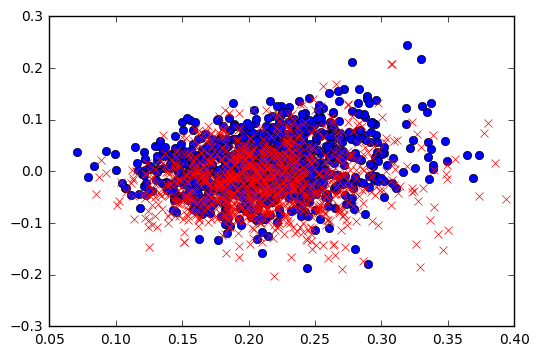

In [75]:
# LSA
pca = TruncatedSVD(n_components=2)
word_pca = pca.fit_transform(word_vector.todense())

for value, target in zip(word_pca, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

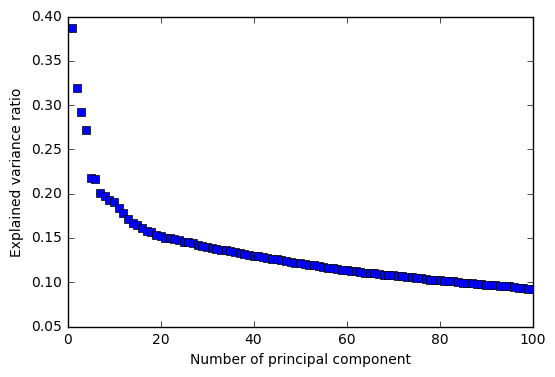

In [22]:
pca = PCA(n_components=100)
word_pca = pca.fit_transform(word_vector.todense())
ratio = pca.explained_variance_ratio_

plt.plot(range(1,101,1),ratio*100,'bs')
plt.xlabel('Number of principal component')
plt.ylabel('Explained variance ratio')

### Manifold

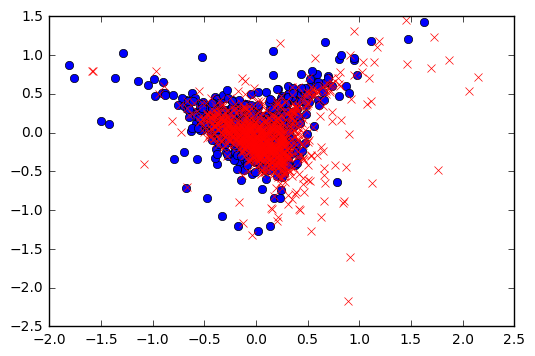

In [27]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=64, n_components=2)
low_d_feature = iso.fit_transform(word_vector.todense())

for value, target in zip(low_d_feature, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

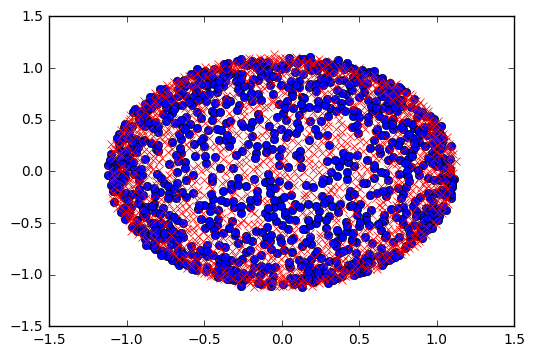

In [32]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
low_d_feature = mds.fit_transform(word_vector.todense())

for value, target in zip(low_d_feature, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

In [33]:
from sklearn.manifold import locally_linear_embedding

low_d_feature = locally_linear_embedding(n_neighbors=64, n_components=2, X=word_vector.todense())

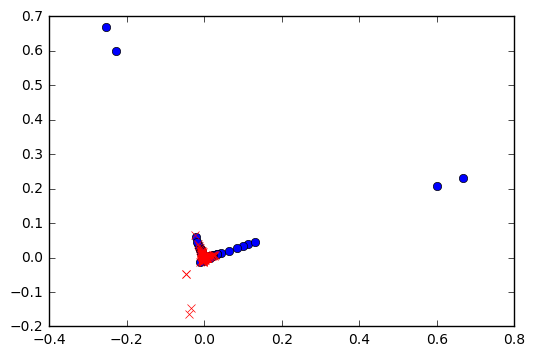

In [37]:
features = low_d_feature[0]

for value, target in zip(features, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

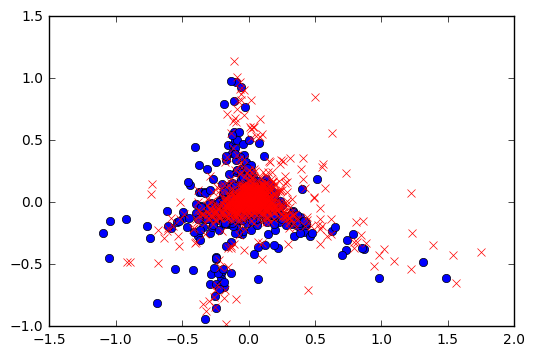

In [38]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=64)
low_d_feature = se.fit_transform(word_vector.todense())

for value, target in zip(low_d_feature, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

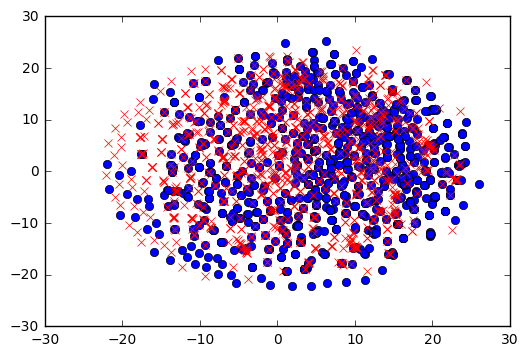

In [39]:
from sklearn.manifold import TSNE

se = TSNE(n_components=2, perplexity=32, init='pca')
low_d_feature = se.fit_transform(word_vector.todense())

for value, target in zip(low_d_feature, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

### Feature selection

81468
42


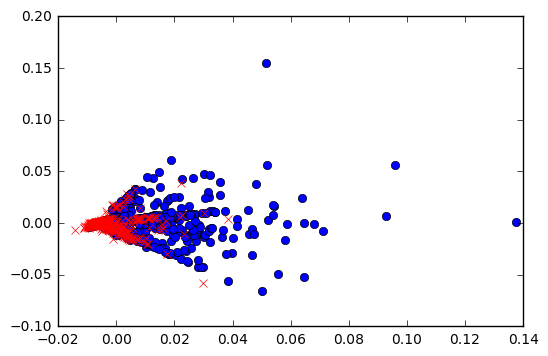

In [31]:
# recall LinearSVC classifier
svc = LinearSVC(C=1000)

selector = SelectFromModel(estimator=svc)
new_feature = selector.fit_transform(word_vector, dataset.target)

pca = PCA()

while True:
    new_feature = selector.fit_transform(new_feature, dataset.target)
    word_pca = pca.fit_transform(new_feature.todense())
    ratio = pca.explained_variance_ratio_
    if np.sum(ratio[:2]) >= 0.13:
        break
    

selector.fit_transform(new_feature, dataset.target)

print(np.size(word_vector.todense()[0,:]))
print(np.size(new_feature.todense()[0,:]))

for value, target in zip(word_pca[:,:2], dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

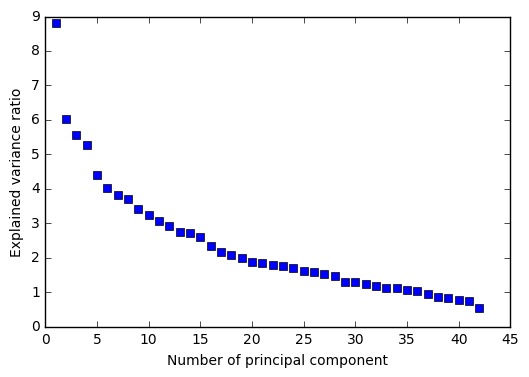

In [32]:
plt.plot(range(1,len(ratio)+1,1),ratio*100,'bs')
plt.xlabel('Number of principal component')
plt.ylabel('Explained variance ratio')

In [60]:
svc = selector.estimator_
y_predicted = svc.predict(new_feature)
cm = metrics.confusion_matrix(dataset.target, y_predicted) # confusion matrix
print(cm)

[[328 672]
 [ 33 967]]


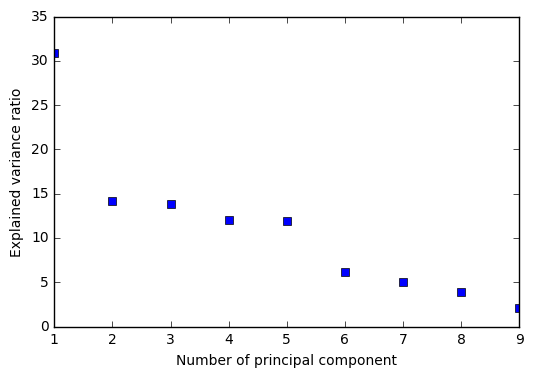

In [61]:
pca = PCA()
word_pca = pca.fit_transform(new_feature.todense())
ratio = pca.explained_variance_ratio_

plt.plot(range(1,len(ratio)+1,1),ratio*100,'bs')
plt.xlabel('Number of principal component')
plt.ylabel('Explained variance ratio')

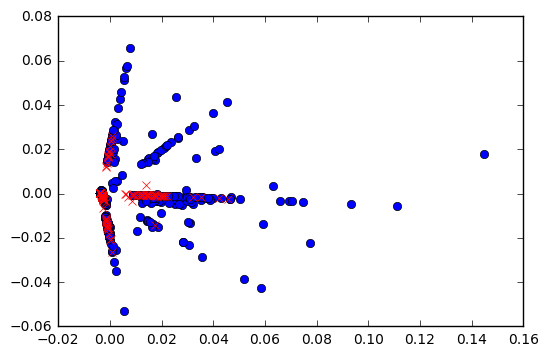

In [62]:
for value, target in zip(word_pca[:,:2], dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

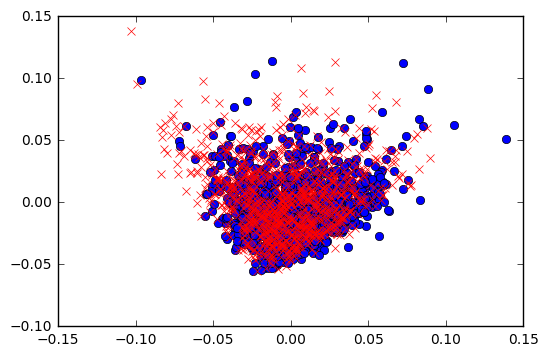

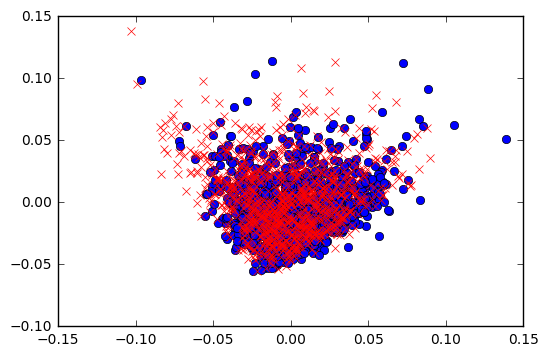

In [16]:
# recall MLP
rfc = RandomForestClassifier(n_estimators=64)

selector = SelectFromModel(estimator=rfc)
new_feature = selector.fit_transform(word_vector, dataset.target)

pca = PCA()
word_pca = pca.fit_transform(new_feature.todense())
ratio = pca.explained_variance_ratio_

i = 1

while True:
    if np.sum(ratio[:2]) < 0.3:
        new_feature = selector.fit_transform(new_feature, dataset.target)
        word_pca = pca.fit_transform(new_feature.todense())
        ratio = pca.explained_variance_ratio_
    elif len(ratio) > 10:
        new_feature = selector.fit_transform(new_feature, dataset.target)
        word_pca = pca.fit_transform(new_feature.todense())
        ratio = pca.explained_variance_ratio_
        plt.figure(i)
        for value, target in zip(word_pca[:,:2], dataset.target):
            if target == 0:
                plt.plot(value[0], value[1], 'bo')
            else:
                plt.plot(value[0], value[1], 'rx')
        i += 1
    else:
        plt.figure(i)
        for value, target in zip(word_pca[:,:2], dataset.target):
            if target == 0:
                plt.plot(value[0], value[1], 'bo')
            else:
                plt.plot(value[0], value[1], 'rx')
        i += 1
        break

In [12]:
ratio

array([ 0.42286859,  0.20344176,  0.13944699,  0.1269758 ,  0.10726686])

In [13]:
sum(ratio[:2])

0.62631035168625904

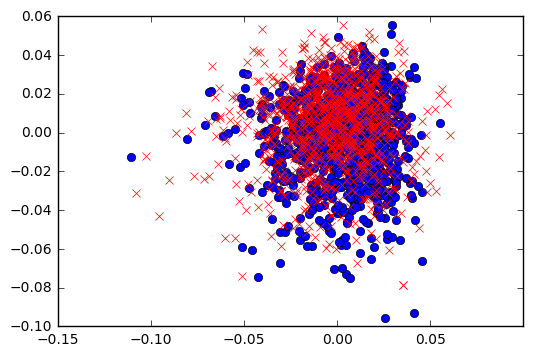

In [69]:
# ICA
ica = FastICA(n_components=2, whiten=True)
word_pca = ica.fit_transform(word_vector.todense())

for value, target in zip(word_pca, dataset.target):
    if target == 0:
        plt.plot(value[0], value[1], 'bo')
    else:
        plt.plot(value[0], value[1], 'rx')

### The part below is using semantic orientation analysis. It requires lots of computation resource and always failed in laptop. Don't rerun it on your own computer.

In [8]:
import pandas as pd
import nltk
import re
import string
from collections import defaultdict
from collections import Counter
import numpy as np



# load words pool from Bing Liu
pos_pool = []
neg_pool = []

lines = open('./positive-words.txt', encoding='iso-8859-1').readlines()
for line in lines:
    pos_pool.append(line[:-1])
    
lines = open('./negative-words.txt', encoding='iso-8859-1').readlines()
for line in lines:
    neg_pool.append(line[:-1])



# function to extract words inside the tweet
def extract_word(content):
    words = [e.lower() for e in nltk.tokenize.word_tokenize(content) 
             if ((len(e) >= 3) and (e not in stop))]
    return (words)



# build word counter, co-occurance matrix
com = defaultdict(lambda: defaultdict(int))
stop = nltk.corpus.stopwords.words('english') + list(string.punctuation)
words_pool = []

for data in dataset.data:
    word_list = extract_word(data.decode('utf-8'))
    
    words_pool += word_list # build words pool
    
    for i in range(len(word_list)-1): # build co-occurance matrix
        for j in range(i+1, len(word_list)):
            w1, w2 = sorted([word_list[i], word_list[j]])
            if w1 != w2:
                com[w1][w2] += 1

words_counter = Counter(words_pool)



# compute word prob
p_w = {}
p_com = defaultdict(lambda : defaultdict(int))
n_pool = float(len(words_pool))
 
for word, n in words_counter.items():
    p_w[word] = n / n_pool
    for cow in com[word]:
        p_com[word][cow] = com[word][cow] / n_pool

        
               
# compute pmi
pmi = defaultdict(lambda : defaultdict(int))
for w1 in p_w:
    for w2 in com[w1]:
        denom = p_w[w1] * p_w[w2]
        pmi[w1][w2] = np.log2(p_com[w1][w2] / denom)

# compute pos/neg orientation of each review
SO_m = {}
for word, n in p_w.items():
    positive_assoc = sum(pmi[word][tx] for tx in pos_pool)
    negative_assoc = sum(pmi[word][tx] for tx in neg_pool)
    SO_m[word] = positive_assoc - negative_assoc

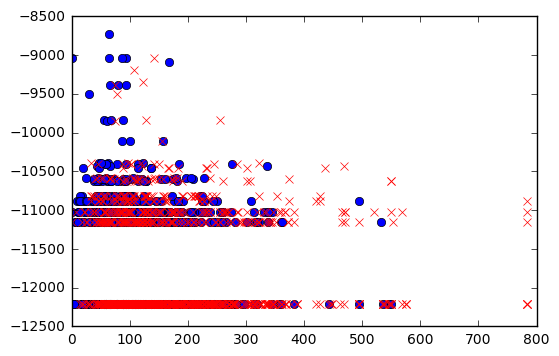

In [19]:
pos_count = []
neg_count = []
for data in dataset.data:
    word_list = extract_word(data.decode('utf-8'))
    pos_orien = 0
    neg_orien = 0
    for word in word_list:
        if (SO_m[word] > pos_orien):
            pos_orien = SO_m[word]
        if (SO_m[word] < neg_orien):
            neg_orien = SO_m[word]
    pos_count.append(pos_orien)
    neg_count.append(neg_orien)

for pos, neg, target in zip(pos_count, neg_count, dataset.target):
    if target == 0:
        plt.plot(pos, neg, 'bo')
    else:
        plt.plot(pos, neg, 'rx')

In [21]:
pos_count = []
neg_count = []
for data in dataset.data:
    word_list = extract_word(data.decode('utf-8'))
    pos_orien = []
    neg_orien = []
    for word in word_list:
        if (SO_m[word] > 0):
            pos_orien.append(SO_m[word])
        if (SO_m[word] < 0):
            neg_orien.append(SO_m[word])
    pos_count.append(np.mean(pos_orien))
    neg_count.append(np.mean(neg_orien))

/home/guanxiong/anaconda2/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/guanxiong/anaconda2/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


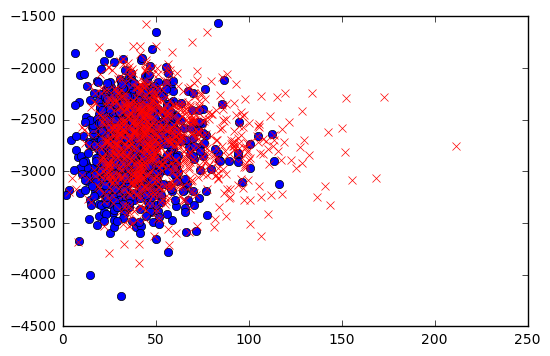

In [22]:
for pos, neg, target in zip(pos_count, neg_count, dataset.target):
    if target == 0:
        plt.plot(pos, neg, 'bo')
    else:
        plt.plot(pos, neg, 'rx')

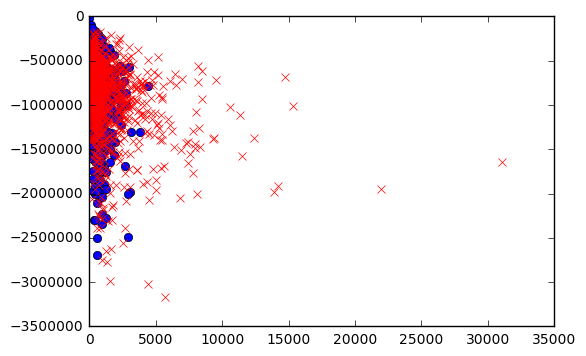

In [12]:
X = []
Y = []
for data in dataset.data:
    word_list = extract_word(data.decode('utf-8'))
    pos_orien = []
    neg_orien = []
    for word in word_list:
        if (SO_m[word] > 0):
            pos_orien.append(SO_m[word])
        if (SO_m[word] < 0):
            neg_orien.append(SO_m[word])
    X.append(np.sum(pos_orien))
    Y.append(np.sum(neg_orien))

for x, y, target in zip(X, Y, dataset.target):
    if target == 0:
        plt.plot(x, y, 'bo')
    else:
        plt.plot(x, y, 'rx')

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 3-TEAM NUMBER ???".